In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from finance.utilities import utils

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#### Testing smoothing

In [2]:
MODEL_ID = 's1'
SYMBOL = 'ASML'
query = f'''
    with
    predictions as (
      select *
      from dev.predictions
    )
    select
        p.model_id
      , p.market_datetime
      , p.symbol
      , p.denormalized_prediction as thirty_day_low_prediction
      , s.open
      , min(s.open) over (
        partition by s.symbol
        order by s.market_datetime
        rows between current row and 30 following
        ) as thirty_day_low
    from predictions as p
    inner join td.stocks as s
      on  p.symbol = s.symbol
      and p.market_datetime = s.market_datetime
    where p.model_id = '{MODEL_ID}'
      --and p.symbol = '{SYMBOL}'
    --limit 10
    '''
df = utils.query_db(query=query)

In [3]:
df

,model_id,market_datetime,symbol,thirty_day_low_prediction,open,thirty_day_low
0,s1,2020-07-07,A,86.077255,88.84,88.83
1,s1,2020-07-08,A,85.908683,89.52,88.83
2,s1,2020-07-09,A,86.351514,89.65,88.83
3,s1,2020-07-10,A,85.960842,89.85,88.83
4,s1,2020-07-13,A,85.847624,89.97,88.83
...,...,...,...,...,...,...
3763,s1,2020-09-10,ALK,35.178800,41.29,40.76
3764,s1,2020-09-11,ALK,35.412137,40.76,40.76
3765,s1,2020-09-14,ALK,34.926263,40.80,40.80
3766,s1,2020-09-15,ALK,34.753235,41.69,41.69


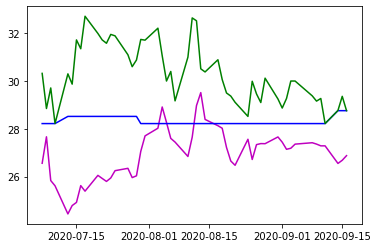

In [4]:
x = df[df['symbol']=='AIG']

plt.plot(x['market_datetime'], x['thirty_day_low_prediction'], color='m')
plt.plot(x['market_datetime'], x['thirty_day_low'], color='b')
plt.plot(x['market_datetime'], x['open'], color='g')
plt.show()